## Stereo camera calibration

This week you'll be provided with a set of stereo images, and your task is to undistort and rectify the images, such that they can be used with the stereo depth reconstruction you made on day 6. You are still not allowed to use opencv functions for block matching/template matching, however you are free to use opencv when undistorting the images. It is recommended that you finish the exercises from Monday before continuing with the weekly project.

The image sets are found in the attached zip-file. Start with the rs.zip and move on to mynteye.zip once you have it working. The physical dimensions of each square of the pattern are 33.6 x 33.6 mm.

Hint: You'll have to undistort the images before rectifying them.

Hint: Some of the relevant functions you'll be using can be found here.

In [9]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [10]:
# Implement the number of vertical and horizontal corners
nb_vertical = 6
nb_horizontal = 9

images = glob.glob('./mynteye/*.png')
assert images

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Implement findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(img, (nb_horizontal, nb_vertical),flags=cv2.CALIB_CB_FAST_CHECK)


    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(100)

cv2.destroyAllWindows()

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [19]:
def undistort(img, mtx, dist):
    h,  w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    return dst

In [20]:
undistorted_imgs = []
for fname in images:
    img = cv2.imread(fname)
    undistorted_imgs.append(undistort(img, mtx, dist))

In [21]:
for img in undistorted_imgs:
        cv2.imshow('img',img)
        cv2.waitKey(100)

cv2.destroyAllWindows()

<Figure size 432x288 with 0 Axes>

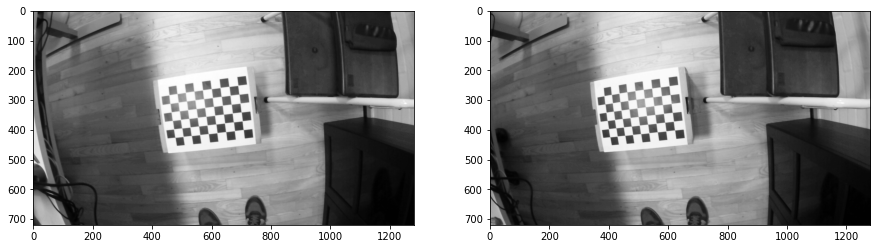

In [25]:
plt.gray()
img_left = cv2.imread('./mynteye/left-0004.png')
img_right = cv2.imread('./mynteye/right-0004.png')

img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)

img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
gray_right= cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)

f, axarr = plt.subplots(1,2, figsize = (15,15))
axarr[0].imshow(gray_left)
axarr[1].imshow(gray_right)

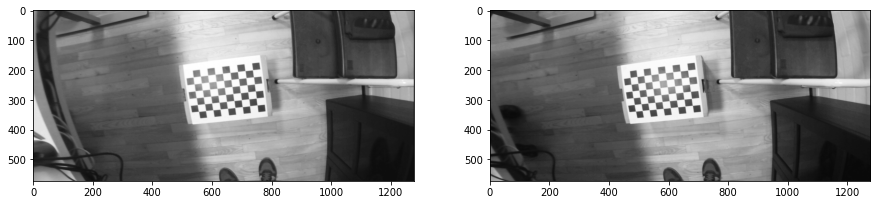

In [27]:
gray_left_undistort = undistort(gray_left, mtx, dist)
gray_right_undistort = undistort(gray_right, mtx, dist)
f, axarr = plt.subplots(1,2, figsize = (15,15))
axarr[0].imshow(gray_left_undistort)
axarr[1].imshow(gray_right_undistort)
